In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # loading data set
train_images, test_images = train_images / 255.0, test_images / 255.0 # normalizing pixel values  

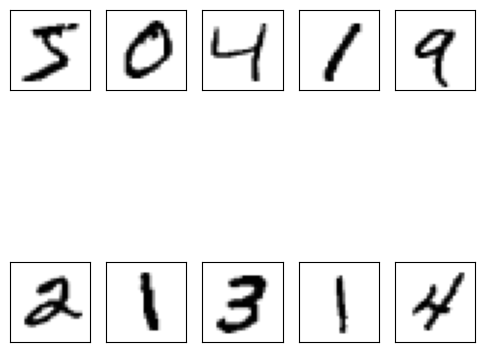

In [4]:
plt.figure(figsize=(6,6))
for i in range (10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

In [5]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,090 (461.29 KB)

 Trainable params: 118,090 (461.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_images,
                      train_labels,
                      epochs=20,
                      verbose=1,
                      callbacks=[early_stopping],
                      validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6324 - loss: 1.1422 - val_accuracy: 0.9475 - val_loss: 0.1697
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9390 - loss: 0.2020 - val_accuracy: 0.9631 - val_loss: 0.1088
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9572 - loss: 0.1448 - val_accuracy: 0.9725 - val_loss: 0.0888
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9641 - loss: 0.1188 - val_accuracy: 0.9730 - val_loss: 0.0831
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9693 - loss: 0.1009 - val_accuracy: 0.9780 - val_loss: 0.0655
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9724 - loss: 0.0878 - val_accuracy: 0.9794 - val_loss: 0.0618
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9763 - loss: 0.0785 - val_accuracy: 0.9811 - val_loss: 0.0605
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9796 -

In [8]:
model.save("MNISTmodel2.keras")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0535


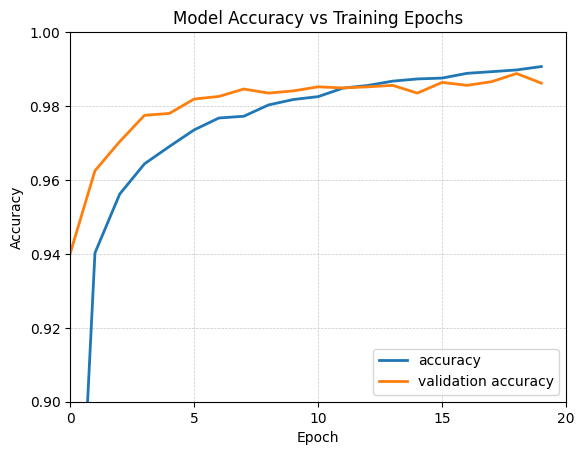

In [13]:
plt.plot(history.history['accuracy'], label='accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label = 'validation accuracy', linewidth=2)
plt.title('Model Accuracy vs Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.xlim([0,20])
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(ticks=[0, 5, 10, 15, 20], labels=['0', '5', '10', '15', '20'])
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

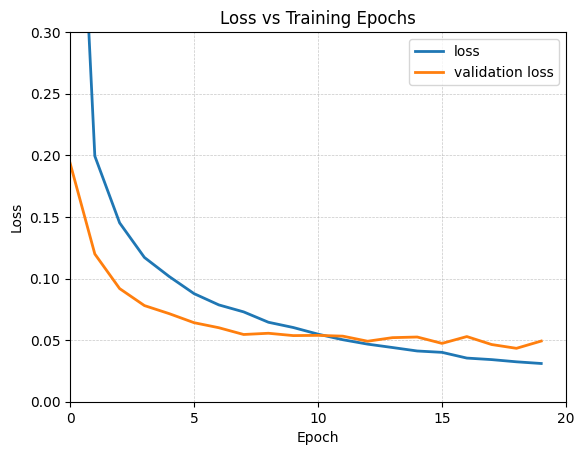

In [14]:
plt.plot(history.history['loss'], label='loss', linewidth=2)
plt.plot(history.history['val_loss'], label = 'validation loss', linewidth=2)
plt.title('Loss vs Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,.3])
plt.xlim([0,20])
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(ticks=[0, 5, 10, 15, 20], labels=['0', '5', '10', '15', '20'])
plt.legend(loc='upper right')

In [15]:
test_acc = test_acc*100
acc_r = round(test_acc, 2)
print(f"Convolutional Neural Network Accuracy: {acc_r} %")

Convolutional Neural Network Accuracy: 98.88 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


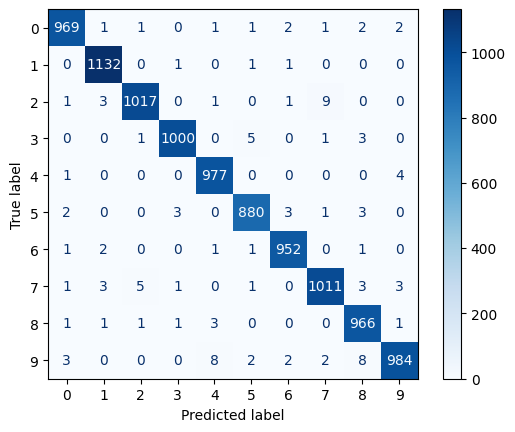

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Assuming predictions are probabilities for each class

# Assuming test_labels are also in one-hot format, convert them to class labels
true_labels = test_labels

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(true_labels))
disp.plot(cmap=plt.cm.Blues)

In [17]:
import pandas as pd
import numpy as np
test = pd.read_csv('mnistkaggletest.csv')
test = test.to_numpy()
matrices = test.reshape(-1, 28, 28)
print("Matrices shape:", matrices.shape)

Matrices shape: (28000, 28, 28)


In [26]:
mnist_model = tf.keras.models.load_model('MNISTmodel.keras')

matrices_reshaped = matrices[..., np.newaxis]  

predictions = model.predict(matrices_reshaped)

predicted_labels = np.argmax(predictions, axis=1)

kaggle_submission = pd.DataFrame({
    'ImageId': range(1,len(predicted_labels)+1),
    'Label': predicted_labels
})

print(kaggle_submission.head())

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


In [27]:
kaggle_submission.to_csv('kaggle_mnist_sub.csv', index=False)
kaggle_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [28]:
max_image_id = kaggle_submission['ImageId'].max()
print(max_image_id)

28000
